#Get the data

In [1]:
import requests
import tarfile
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import requests
import tarfile
import os
import pandas as pd

def download_and_extract_tgz(url, extract_path="./datasets"):
  filename = url.split("/")[-1]

  response = requests.get(url, stream=True)
  if response.status_code == 200:
    with open(filename, "wb") as f:
      for chunk in response.iter_content(chunk_size=1024):
        f.write(chunk)
  else:
    raise Exception(f"Failed to download file: {response.status_code}")

  os.makedirs(extract_path, exist_ok=True)

  with tarfile.open(filename, "r:gz") as tar:   # open for reading with gzip compression
    tar.extractall(path=extract_path)
    print(f"Extracted to: {extract_path}")

  os.remove(filename)

In [3]:
url = "https://github.com/ageron/data/raw/main/housing.tgz"
download_and_extract_tgz(url)
housing = pd.read_csv("datasets/housing/housing.csv")

Extracted to: ./datasets


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
plt.rc("font", size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [9]:
IMAGES_PATH = "./images/end_to_end_project"
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
  path = f"{IMAGES_PATH}/{fig_name}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

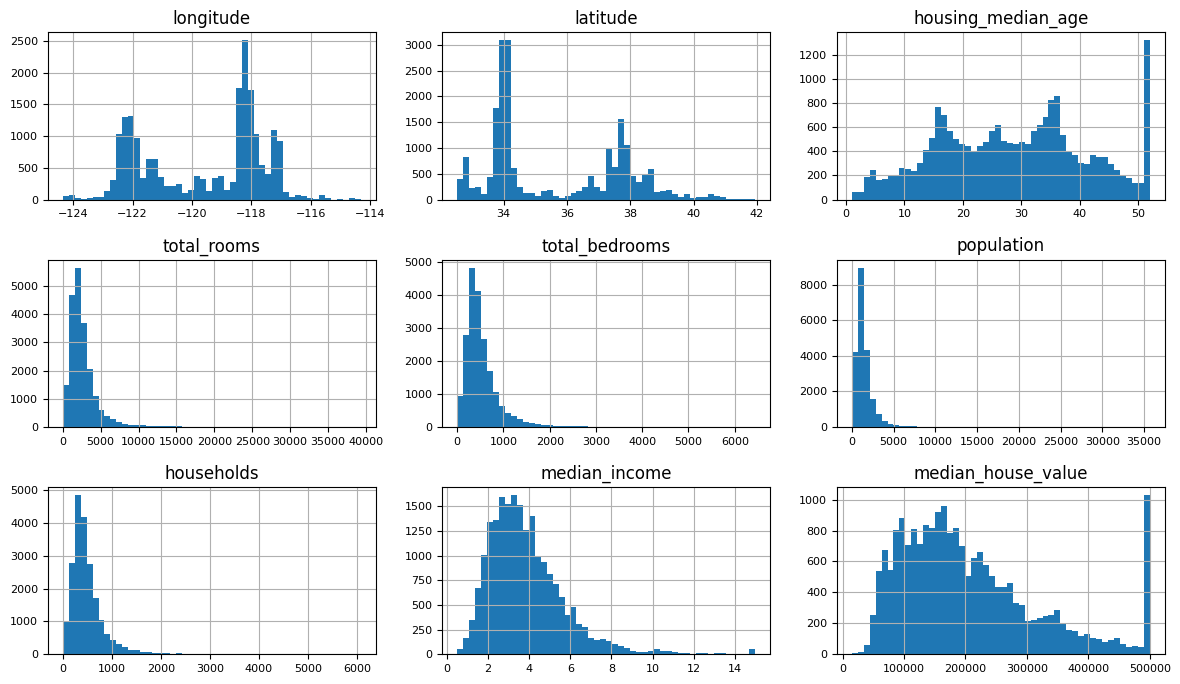

In [10]:
housing.hist(bins=50, figsize=(12,7))
save_fig("attribute_histogram_plots")
plt.show()

### Create a test set

**completely random sampling methods**

In [11]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  np.random.seed(42)
  shuffled_indices = np.random.permutation(len(data)) # array([20046,  3024, 15663, ...,  5390,   860, 15795])
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [13]:
len(train_set), len(test_set)

(16512, 4128)

*The above solution will fail when a new batch of updated data is provided. To maintain a stable training/test split even after the dataset is updated, we can select examples that are part of the test set using their identifiers (assuming these samples contain unique and immutable identifiers). For example, you could compute a hash of each identifier and include that example in your test dataset if the hash value is less than or equal to 20% of the maximum hash value.*

In [14]:
2**32

4294967296

In [15]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  # crc32 returns a number between 0 and 2^32 - 1
  # we multiply test_ratio by 2**32 to get the limit below which a hash means assignment to the test set
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [17]:
len(train_set), len(test_set)

(16512, 4128)

In [18]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [19]:
len(train_set), len(test_set)

(16322, 4318)

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(16512, 4128)

*Let's take a closer look at the median income histogram - most values ​​fall between 1.5 and 6 (i.e., 15,000 and $60,000), but some significantly exceed 6. It is important that each layer of the dataset contains a sufficient number of examples, otherwise the estimate of the significance of a given layer may be inaccurate.*

In [21]:
housing[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


**stratified sampling methods**

*Stratified sampling is a probability sampling technique where a population is divided into subgroups (strata) based on shared characteristics, and then random samples are taken from each stratum. This ensures representation from all relevant subgroups in the final sample.*

In [22]:
# pandas.cut - Use cut when you need to segment and sort data values into bins.
# This function is also useful for going from a continuous variable to a categorical variable.

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1, 2, 3, 4, 5])

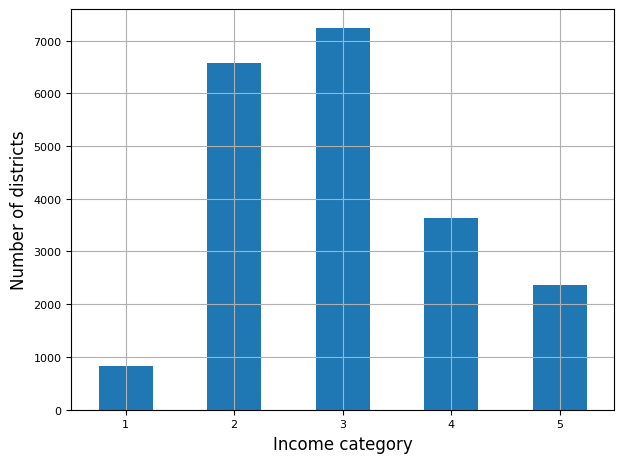

In [23]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")
plt.show()

In [24]:
# Now we can perform stratified sampling
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])

In [25]:
strat_train_set, strat_test_set = strat_splits[0]
strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

In [26]:
# It's much shorter to get a single stratified split:

strat_train_set, strat_test_set = train_test_split(housing,
                                                   test_size=0.2,
                                                   stratify=housing["income_cat"],
                                                   random_state=42)
strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

In [27]:
strat_test_set["income_cat"].value_counts().sort_index() / len(strat_test_set)

,count
income_cat,
1,0.039971
2,0.318798
3,0.350533
4,0.176357
5,0.114341


In [28]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
  "Overall %": income_cat_proportions(housing),
  "Stratified %": income_cat_proportions(strat_test_set),
  "Random %": income_cat_proportions(test_set),
}).sort_index()

compare_props["Strat. Error %"] = (compare_props["Stratified %"] / compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] / compare_props["Overall %"] - 1)

compare_props.index.name = "Income Category"
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


*As can be seen, the test set generated using stratified sampling has proportions almost identical to those obtained in the full data set, while the results obtained in the completely random data set show skewed proportions.*

In [29]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [30]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


#Discover and Visualize the Data to Gain Insights

In [31]:
housing = strat_train_set.copy()

##### Visualize geographic data

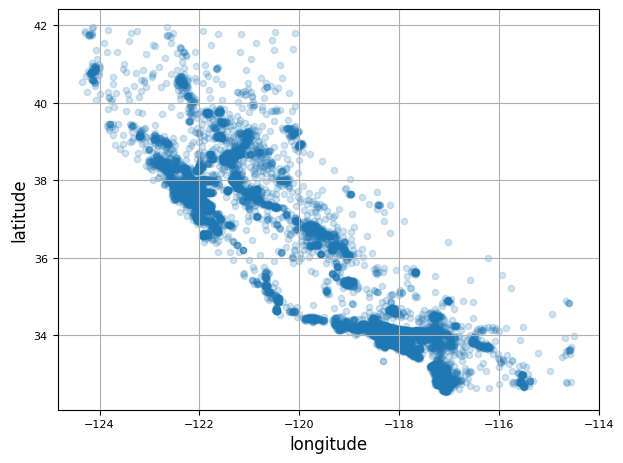

In [32]:
housing.plot.scatter(x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("geo_visualization_plot")
plt.show()

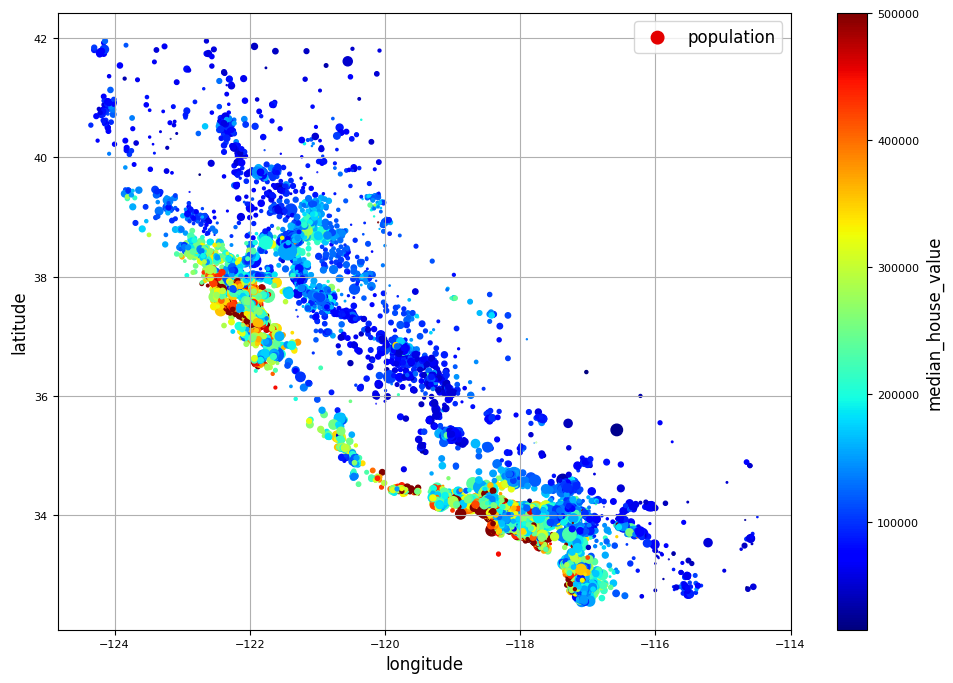

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap="jet",
             figsize=(10,7))
save_fig("housing_prices_scatterplot")
plt.show()

##### Look for correlations
*we can easily calculate the linear correlation coefficient (also called the Pearson correlation coefficient) between each pair of values ​​using the corr() method.*

In [34]:
corr_matrix = housing.select_dtypes(include="number").corr()

In [35]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [36]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


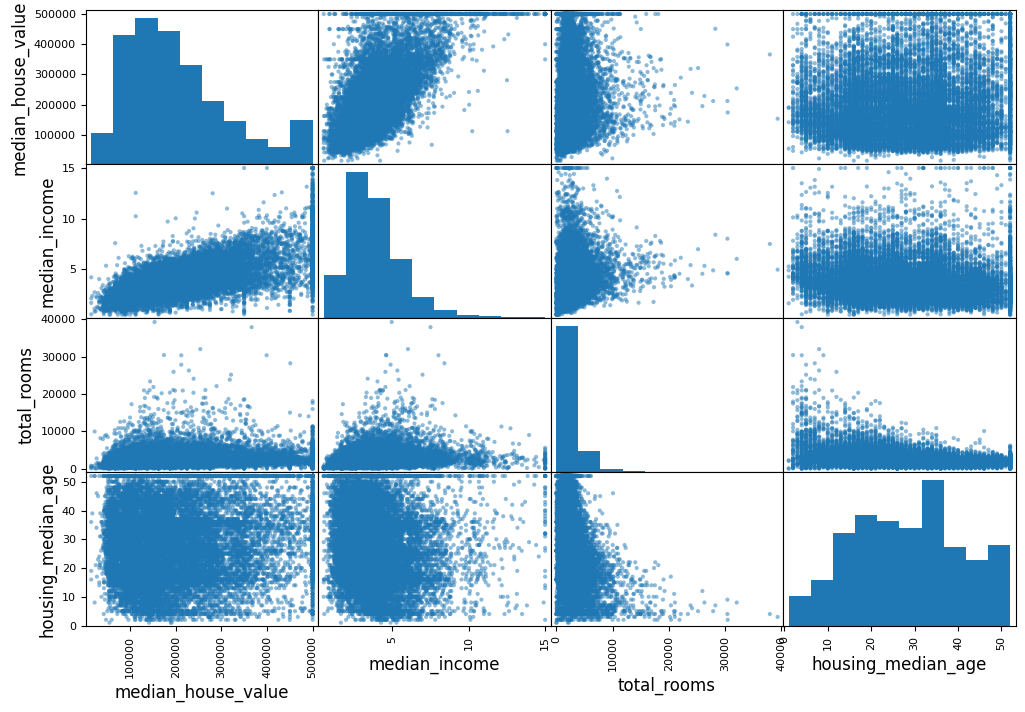

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

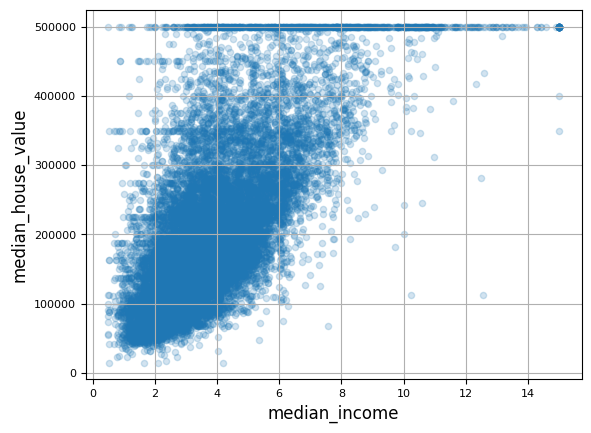

In [38]:
housing.plot.scatter(x="median_income", y="median_house_value", alpha=0.2, grid=True)
plt.show()

*We learn a few things from this graph. First, the correlation between these attributes is quite strong; we can easily see an upward trend, with the individual points being quite close together. Second, the aforementioned price limit is clearly visible as a horizontal line at 500,000. However, we can also see less obvious lines: a horizontal line at 450,000, another one around 350,000, perhaps another one around $280,000, and a few others below that. It would be worthwhile to try removing the districts responsible for this from the data to prevent the algorithms from learning to reproduce such oddities.*

#### Experimenting with Attribute Combinations

*The total number of rooms in a district isn't a very valuable attribute if we don't know the number of families residing there. In reality, we're interested in the number of rooms per family. The total number of bedrooms doesn't tell us anything by itself: it should probably be compared to the total number of rooms. Another interesting combination of attributes is to determine the relationship between population and the number of families.*

In [39]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [40]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


# Prepare the Data for Machine Learning Algorithms

In [41]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Data Cleaning

*The total_bedrooms attribute is missing some values. We have three options:*
1. Remove districts containing missing data;
2. Remove the entire attribute;
3. Fill in the missing data with a specific value (zero, mean, median, etc.).

*This is called imputation.*

In [42]:
housing.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,168
population,0
households,0
median_income,0
ocean_proximity,0


In [43]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [44]:
# housing.dropna(subset=["total_bedrooms"], inplace=True)     # option 1
# housing.drop("total_bedrooms", axis=1)                      # option 2

# median = housing["total_bedrooms"].median()                 # option 3
# housing["total_bedrooms"].fillna(median, inplace=True)

In [45]:
# option 3 using the SimpleImputer class

from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy="median").set_output(transform="pandas")
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include="number")

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [46]:
stats = imputer.statistics_
np.set_printoptions(precision=2, suppress=True) # suppress=True disables exponential notation
stats

array([-118.51,   34.26,   29.  , 2125.  ,  434.  , 1167.  ,  408.  ,
          3.54])

In [47]:
housing_num.median().values

array([-118.51,   34.26,   29.  , 2125.  ,  434.  , 1167.  ,  408.  ,
          3.54])

In [48]:
X = imputer.transform(housing_num)

In [49]:
X[:3]

array([[-122.42,   37.8 ,   52.  , 3321.  , 1115.  , 1576.  , 1034.  ,
           2.1 ],
       [-118.38,   34.14,   40.  , 1965.  ,  354.  ,  666.  ,  357.  ,
           6.09],
       [-121.98,   38.36,   33.  , 1083.  ,  217.  ,  562.  ,  203.  ,
           2.43]])

**Other Model Based Imputing Methods**

* `KNN Imputer`: For each datapoint missing values, KNN Imputer maps the dataset excluding the features with missing values in the n-dimensional coordinate space and then calculates the closest points to that datapoint. The average of the relevant features for those closest points then becomes the imputed missing values.
* `Iterative Imputer`: While it has all of the same benefits as KNN Imputer, producing more accurate estimates of missing values with less manual labor, Iterative Imputer uses a different strategy for getting there. Instead, it regresses a feature with missing values on the dataset’s other features and then replaces the missing values with the predicted value from the regression model.

*Scikit-Learn transformers (without set_output(transform="pandas")) output NumPy arrays (and sometimes SciPy sparse matrices) even when fed Pandas DataFrames as input.*

In [50]:
housing_tr = pd.DataFrame(X,
                          columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.loc[null_rows_idx].head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


**Now let's drop some outliers - anomaly detection**

In [51]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [52]:
# drop outliers

#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

### Handling Text and Categorical Attributes

In [53]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [54]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [55]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

*There's a problem with this approach: machine learning algorithms will consider two close values ​​to be more similar to each other than to distant values. In some cases, this isn't a problem (e.g., with ordered categories like "bad," "average," "good," and "excellent"), but of course, this doesn't apply to the ocean_proximity column (e.g., categories 0 and 4 are significantly more similar than 0 and 1). A common approach is to create a single binary attribute for each category: one attribute has a value of 1 if the category is <1H OCEAN (it gets a value of 0 otherwise), another attribute gets a value of 1 for the INLAND category (and 0 for the other categories), and so on. This is called one-hot encoding, because only one attribute will be "hot" (it will have a value of 1), while the others will be "cold" (it will get a value of 0). New attributes are sometimes called dummy attributes.*

In [56]:
from sklearn.preprocessing import OneHotEncoder

hot_encoder = OneHotEncoder()
# hot_encoder = OneHotEncoder(sparse_output=False)  # transform() will directly return a regular (dense) array
housing_cat_1hot = hot_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [57]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [58]:
hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [59]:
# Pandas get_dummies() - outputs a Pandas DataFrame

pd.get_dummies(housing_cat)[:5]

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,False,False,False,True,False
14973,True,False,False,False,False
3785,False,True,False,False,False
14689,False,True,False,False,False
20507,False,False,False,False,True


In [60]:
hot_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [61]:
hot_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature Scaling

*There are two common types of scaling all attributes to a single level: `min-max scaling` and `standardization`.*

*Min-max scaling (sometimes called normalization) is the simplest process: for each attribute, the values ​​are shifted and scaled so that they fall between 0 and 1. This is achieved by subtracting the minimum value from the given value and dividing the result by the difference between the maximum and minimum values. In Scikit-Learn, the transformation function MinMaxScaler is used for this purpose. It includes a feature_range hyperparameter that allows you to change the scale range if the default range of 0–1 is not suitable for you (e.g., neural networks work best with data with a mean of zero, so a range of −1 to 1 is preferred).*

In [62]:
housing_num[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330


In [63]:
# normalization
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_mm_scaled = min_max_scaler.fit_transform(housing_num)

In [64]:
# standarization
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [65]:
housing_num_mm_scaled[:3]

array([[-0.61,  0.12,  1.  , -0.83, -0.64, -0.81, -0.61, -0.78],
       [ 0.21, -0.66,  0.53, -0.9 , -0.89, -0.92, -0.87, -0.23],
       [-0.52,  0.24,  0.25, -0.95, -0.93, -0.93, -0.92, -0.73]])

In [66]:
housing_num_std_scaled[:3]

array([[-1.42,  1.01,  1.86,  0.31,  1.36,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17],
       [-1.2 ,  1.28,  0.35, -0.71, -0.76, -0.79, -0.78, -0.76]])

#### Heavy-tail reduction

*When a feature's distribution is heavy-tailed (e.g., values ​​far from the mean are not exceptionally rare), both min-max scaling and standardization
"squeeze" most values ​​into a narrow range. For most machine learning models, this is undesirable. Therefore, before rescaling a feature, you should first transform it to reduce its heavy-tailedness and, if possible,
obtain an approximately symmetric distribution.*

In [67]:
# Log transform - for positive and strongly right-skewed features

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [68]:
# Square Root Transform - for positive and strongly left-skewed features

from sklearn.preprocessing import FunctionTransformer
sqrt_transformer = FunctionTransformer(np.sqrt)

In [69]:
# Power Tranformer (Box-Cox) - for positive values
# Power Tranformer (Yeo-Johnson) - can handle both positive and negative values

from sklearn.preprocessing import PowerTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
boxcox_pop = pt_boxcox.fit_transform(housing[["population"]])

pt_yeo = PowerTransformer(method='yeo-johnson', standardize=False)
yeo_pop = pt_yeo.fit_transform(housing[["population"]])

boxcox_pop_df = pd.DataFrame(boxcox_pop, columns=["population_boxcox"])
yeo_pop_df = pd.DataFrame(yeo_pop, columns=["population_boxcox"])

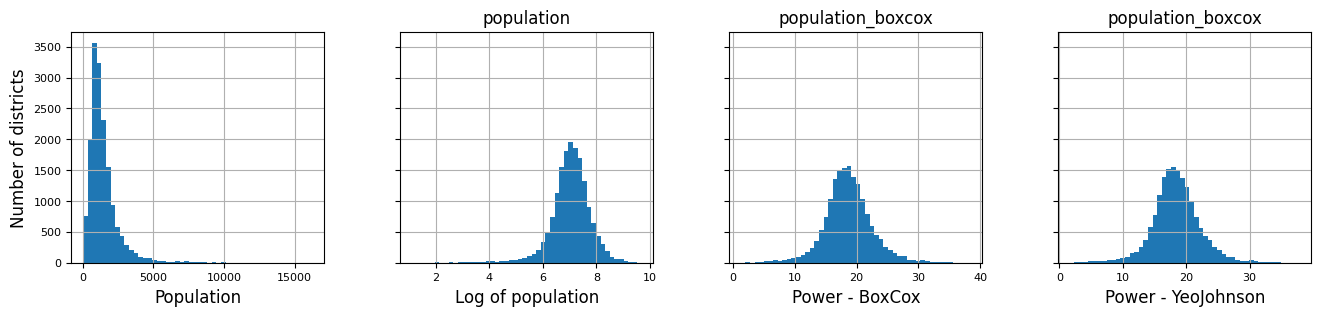

In [70]:
fig, axs = plt.subplots(1, 4, figsize=(16, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
log_pop.hist(ax=axs[1], bins=50)
boxcox_pop_df.hist(ax=axs[2], bins=50)
yeo_pop_df.hist(ax=axs[3], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[2].set_xlabel("Power - BoxCox")
axs[3].set_xlabel("Power - YeoJohnson")
axs[0].set_ylabel("Number of districts")
plt.show()

### Transformation Pipelines

*All estimators except the last one (which can be anything: a transformer, a predictor, or any other estimator) must be transformation functions (they must contain a fit_transform() method).*

*When the fit() method is called, the fit_transform() method is called sequentially for all transformers, passing the result of each call as a parameter to the next call until the last estimator is reached, for which the fit() method is called.*

In [71]:
from sklearn.pipeline import Pipeline

num_pipeline_named = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standarize", StandardScaler())
])

In [72]:
num_pipeline_named["standarize"]

StandardScaler()

In [73]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [74]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [75]:
num_pipeline[0]

SimpleImputer(strategy='median')

*If you call the pipeline's transform() method, it will apply all transformations to the data sequentially. If the last estimator were a predictor, the entire pipeline would have a predict() method, not a transform(). Calling this method would apply all transformations to the data sequentially, and the result would be passed to the predictor's predict() method.*

In [76]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [77]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared,
    columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index
)
df_housing_num_prepared[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789


**ColumnTransformer**

*It would be more convenient if we had a single transformer that processed all the columns and selected the appropriate transformations for each column type.*

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocesing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

*Creating a list of column names isn't very convenient, so Scikit-Learn includes a make_column_selector() function that returns a selector function that can be used to automatically select all features of a given type, such as numeric or categorical.*

In [79]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

housing_prepared = preprocessing.fit_transform(housing)

housing_prepared_df = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index
)

housing_prepared_df.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


In [80]:
X

array([[-122.42,   37.8 ,   52.  , ..., 1576.  , 1034.  ,    2.1 ],
       [-118.38,   34.14,   40.  , ...,  666.  ,  357.  ,    6.09],
       [-121.98,   38.36,   33.  , ...,  562.  ,  203.  ,    2.43],
       ...,
       [-117.06,   32.59,   13.  , ..., 2814.  ,  760.  ,    4.06],
       [-118.4 ,   34.06,   37.  , ..., 1725.  ,  838.  ,    4.15],
       [-122.41,   37.66,   44.  , ...,  682.  ,  212.  ,    3.28]])

### One complete pipeline that performs all transformations

* Missing values ​​in numerical features will be replaced by the median, as most machine learning algorithms don't expect missing data.
In categorical features, missing values ​​will be replaced by the most frequently occurring category.
* The categorical feature will be hot-coded, as most machine learning algorithms only accept numerical data as input.
* Several ratio features will be calculated and included: bedrooms_ratio, rooms_per_house, and people_per_house. We hope these will better correlate with the median house value and thus aid machine learning models.
* Several cluster similarity features will also be added. These will likely prove more useful than geographic coordinates.
* Long-tail features will be replaced by their logarithms, as most models prefer features with roughly uniform or Gaussian distributions.
* All numerical features will be standardized, as most machine learning algorithms prefer features of roughly the same scale.

In [81]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND


In [82]:
# housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
# housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
# housing["people_per_house"] = housing["population"] / housing["households"]

In [83]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters,
                          n_init=10, # runs KMeans 10 times with different centroids and chooses the best result
                          random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self  # always return self!

  # for each point in X, calculates the RBF similarity to each of the cluster centers
  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

# What does gamma do?
# A small gamma value → the kernel decreases slowly:
# → Points further from the center still have significant similarity.
# → The kernel is "broad," more global.

# A large gamma value → the kernel decreases rapidly:
# → Only points very close to the center have high similarity.
# → The kernel is "narrow," more local.

In [84]:
housing.shape, housing_labels.shape

((16512, 9), (16512,))

In [85]:
cluster_sim = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_sim.fit_transform(housing[["latitude", "longitude"]],
                                         sample_weight=housing_labels)
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

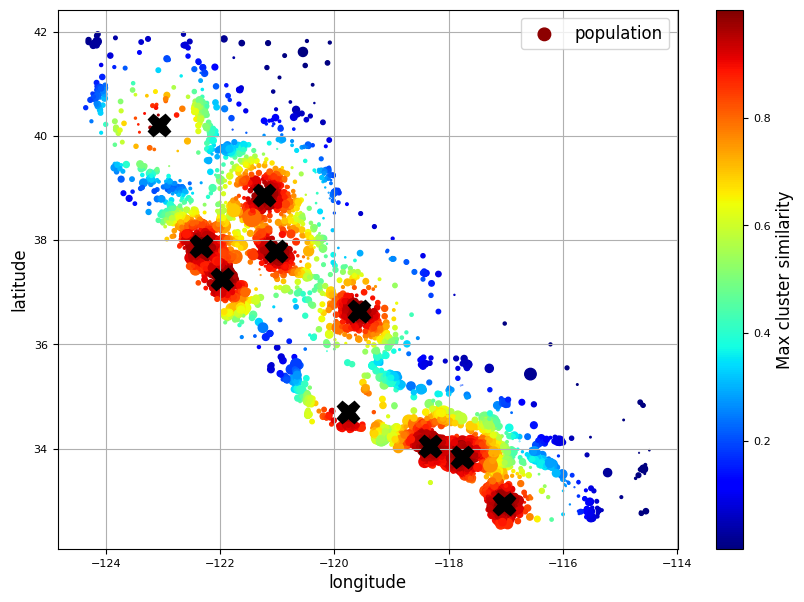

In [86]:
housing_p = housing.copy()
housing_p["Max cluster similarity"] = similarities.max(axis=1)

housing_p.plot(kind="scatter", x="longitude", y="latitude", grid=True,
               s=housing_p["population"] / 100, label="population",
               c="Max cluster similarity", cmap="jet",
               legend=True, figsize=(10, 7))
plt.plot(cluster_sim.kmeans_.cluster_centers_[:, 1],
         cluster_sim.kmeans_.cluster_centers_[:, 0],
         color="black", marker="X", markersize=16,
         linestyle="", label="Cluster centers")
plt.show()

In [87]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer


def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_sim = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                           "households", "median_income"]),
    ("geo", cluster_sim, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder=default_num_pipeline)
# apply default_num_pipeline to all columns not mentioned earlier:
# housing_median_age is left

In [88]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [89]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Select and Train a Model

###Training and Evaluating on the Training Set

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x78a...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78ac432477d0>)])),
                ('linearregression', LinearRegression())])

In [91]:
housing_pred = lin_reg.predict(housing)
housing_pred[:5].round(2)

array([242761.81, 375862.79, 127480.98,  99355.3 , 324610.74])

In [92]:
housing_labels.iloc[:5].round(2)

,median_house_value
13096,458300.0
14973,483800.0
3785,101700.0
14689,96100.0
20507,361800.0


In [93]:
error_ratios = housing_pred[:10].round(2) / housing_labels.iloc[:10].round(2).values - 1
[f"{100 * ratio:.1f}%" for ratio in error_ratios]

['-47.0%',
 '-22.3%',
 '25.4%',
 '3.4%',
 '-10.3%',
 '108.5%',
 '-11.1%',
 '-24.1%',
 '18.5%',
 '-46.2%']

In [94]:
housing_labels.values

array([458300., 483800., 101700., ..., 148800., 500001., 233300.])

In [95]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(housing_labels.values, housing_pred)
lin_rmse

68647.95686706658

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x78a...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78ac432477d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [97]:
housing_pred = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_pred)
tree_rmse

0.0

*What? No error? Could this model be 100% error-free? Of course, it's much more likely that the model was simply significantly overtrained.*

*One way to evaluate a decision tree model would be to use the train_test_split() function to split the training set into training and validation subsets, then train our model using this training set, and then evaluate it using the validation set.*

*An excellent alternative is to use k-fold cross-validation. Using the following code, the training set is randomly split into 10 non-overlapping folds, and the decision tree model is then trained and evaluated ten times (each time a different subset is selected for model performance evaluation, and the remaining nine are used for training).*

**Better Evaluation Using Cross-Validation**

In [98]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,66366.983603
std,1976.844743
min,63557.655007
25%,65004.623899
50%,65886.897085
75%,68129.026040
max,69530.301101


In [99]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocesing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,48920.517843
std,715.207292
min,47479.120613
25%,48492.372660
50%,49001.090516
75%,49386.763452
max,49998.347019


In [100]:
forest_reg.fit(housing, housing_labels)
housing_pred = forest_reg.predict(housing)
forest_rmse = root_mean_squared_error(housing_labels, housing_pred)
forest_rmse

18057.976055305204

## Fine-Tune Your Model

### Grid Search

In [101]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

# max_features - Fewer features at each split make the model more random which
# can help reduce overfitting. However less features may lead to underfitting.

param_grid = [
    {"preprocessing__geo__n_clusters": [5, 8, 10],
     "random_forest__max_features": [4, 6, 8]},
    {"preprocessing__geo__n_clusters": [10, 15],
     "random_forest__max_features": [6, 8, 10]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring="neg_root_mean_squared_error")

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x78ac432477d0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [102]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [103]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x78ac432...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78ac430af790>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [104]:
grid_search.cv_results_

{'mean_fit_time': array([ 5.69,  8.16, 11.04,  6.67,  8.74, 11.38,  6.73,  8.89, 11.36,
         8.77, 11.17, 14.01,  9.06, 11.77, 14.28]),
 'std_fit_time': array([0.36, 0.14, 0.43, 0.44, 0.4 , 0.2 , 0.47, 0.35, 0.32, 0.11, 0.35,
        0.22, 0.27, 0.18, 0.14]),
 'mean_score_time': array([0.19, 0.23, 0.25, 0.24, 0.23, 0.23, 0.22, 0.21, 0.22, 0.22, 0.23,
        0.23, 0.21, 0.23, 0.2 ]),
 'std_score_time': array([0.  , 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.01, 0.02, 0.01, 0.03,
        0.03, 0.02, 0.02, 0.01]),
 'param_preprocessing__geo__n_clusters': masked_array(data=[5, 5, 5, 8, 8, 8, 10, 10, 10, 10, 10, 10, 15, 15, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value=999999),
 'param_random_forest__max_features': masked_array(data=[4, 6, 8, 4, 6, 8, 4, 6, 8, 6, 8, 10, 6, 8, 10],
              mask=[False, False, False, False, False, False, False, False,
             

In [105]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,9.058944,0.268704,0.211243,0.016867,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43006.650208,-43683.244212,-44158.332131,-43616.075517,472.565014,1
13,11.772502,0.178984,0.229750,0.019922,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43696.807883,-44011.195266,-44819.026722,-44175.676624,472.676329,2
7,8.889320,0.352036,0.208177,0.012178,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44132.827198,-45226.940308,-44356.476185,639.295570,3
9,8.769876,0.112838,0.215028,0.010800,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44132.827198,-45226.940308,-44356.476185,639.295570,3
6,6.731002,0.472514,0.223805,0.028444,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43797.854175,-44232.653866,-45100.371162,-44376.959735,541.452222,5


### Randomized Search

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"preprocessing__geo__n_clusters": randint(low=3, high=50),
                  "random_forest__max_features": randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(full_pipeline,
                                param_distributions=param_distribs,
                                n_iter=10, cv=3,
                                scoring="neg_root_mean_squared_error",
                                random_state=42)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ac430e0d50>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ac4341b890>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [107]:
rnd_search.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [108]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,14.726366,0.104777,0.244610,0.042615,45,9,"{'preprocessing__geo__n_clusters': 45, 'random...",-41224.050287,-42385.046696,-42711.986848,-42107.027943,638.466717,1
8,11.454102,0.108579,0.202284,0.005973,32,7,"{'preprocessing__geo__n_clusters': 32, 'random...",-41373.971481,-42579.487116,-43229.716998,-42394.391865,768.827265,2
0,24.628006,0.032114,0.232955,0.033563,41,16,"{'preprocessing__geo__n_clusters': 41, 'random...",-42397.277866,-42640.399651,-43175.094475,-42737.590664,324.894074,3
5,7.543261,0.394510,0.228399,0.019588,42,4,"{'preprocessing__geo__n_clusters': 42, 'random...",-41873.819760,-43347.904502,-43689.910761,-42970.545008,787.970715,4
2,12.478526,0.174467,0.284643,0.014704,23,8,"{'preprocessing__geo__n_clusters': 23, 'random...",-42420.517191,-43137.567362,-43585.144979,-43047.743177,479.680977,5


In [110]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.02, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [111]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.18883049114642353), 'log__median_income'),
 (np.float64(0.07550690165952419), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06427087748676082), 'bedrooms__ratio'),
 (np.float64(0.0521695509969851), 'rooms_per_house__ratio'),
 (np.float64(0.04664258696240615), 'people_per_house__ratio'),
 (np.float64(0.04244311259449021), 'geo__Cluster 3 similarity'),
 (np.float64(0.02329106317954673), 'geo__Cluster 17 similarity'),
 (np.float64(0.022649484211911694), 'geo__Cluster 18 similarity'),
 (np.float64(0.02197243576680579), 'geo__Cluster 22 similarity'),
 (np.float64(0.01881537204558837), 'geo__Cluster 40 similarity'),
 (np.float64(0.01766998676736003), 'geo__Cluster 10 similarity'),
 (np.float64(0.01754694953848625), 'geo__Cluster 35 similarity'),
 (np.float64(0.017274903717750808), 'geo__Cluster 41 similarity'),
 (np.float64(0.016055663107420095), 'geo__Cluster 6 similarity'),
 (np.float64(0.015811758952117744), 'geo__Cluster 2 similarity'),
 (np.float64(0.01477755940463033), 

*The sklearn.feature_selection.SelectFromModel transformer can automatically discard the least useful features: when you fit it, it trains the model (usually using random forest), looks up its feature_importances_ attribute, and selects the most useful features. Then, when the transform() method is called, the remaining features are discarded.*

### Evaluate Your System on the Test Set

In [115]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test.shape, y_test.shape

((4128, 9), (4128,))

In [117]:
final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

41556.053474456494

*In some situations, this point estimate of the generalization error might not be convincing enough: what if the model is only 0.1% better than the one currently used in production? You might want to find out how precise this estimate is. To do this, you can calculate a 95% confidence interval for the generalization error using the scipy.stats.t.interval() function.*

In [119]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39415.12, 43591.97])